In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Country-data.csv')
df.set_index('country', inplace=True)
df

ModuleNotFoundError: No module named 'kneed'

Кореляційна матриця та теплова карта

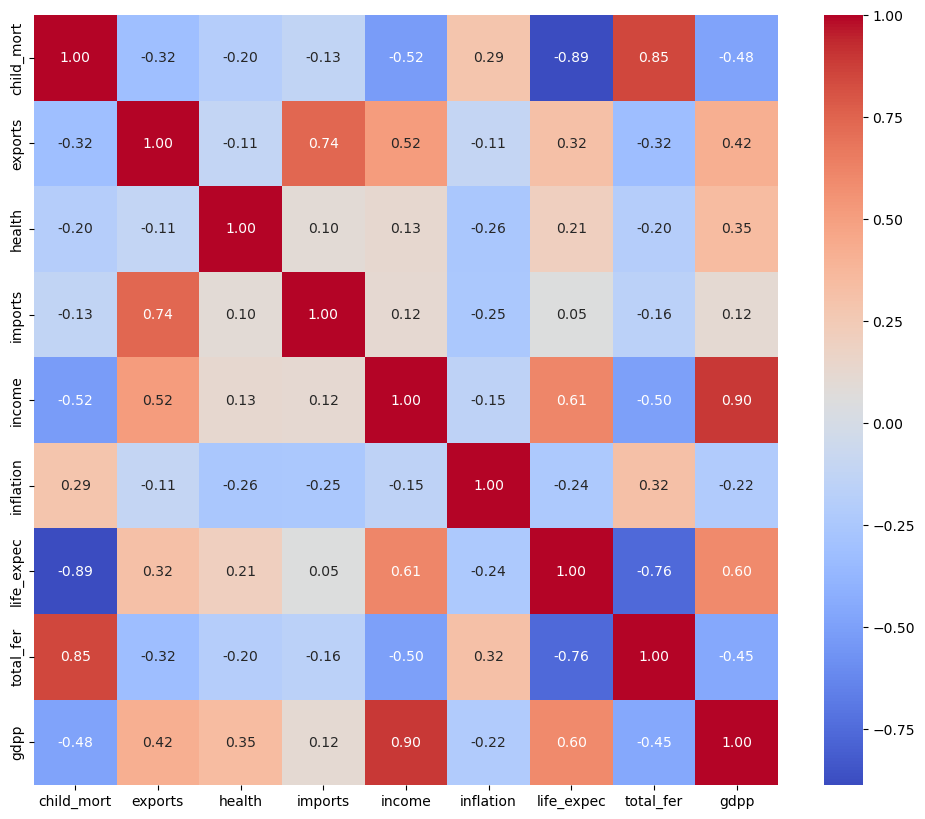

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Однофакторний аналіз 

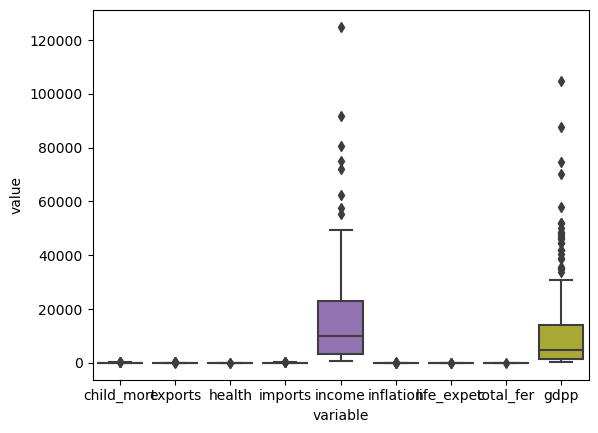

In [ ]:
sb.boxplot(x='variable', y='value', data=pd.melt(df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]))
plt.show()

Двофакторний аналіз

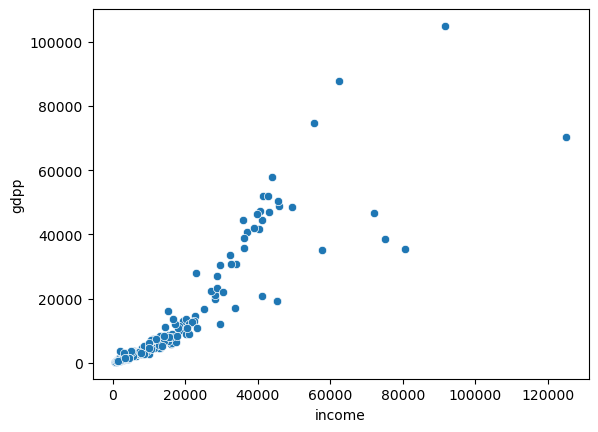

In [ ]:
sb.scatterplot(x='income', y='gdpp', data=df)
plt.show()

Аналіз викидів

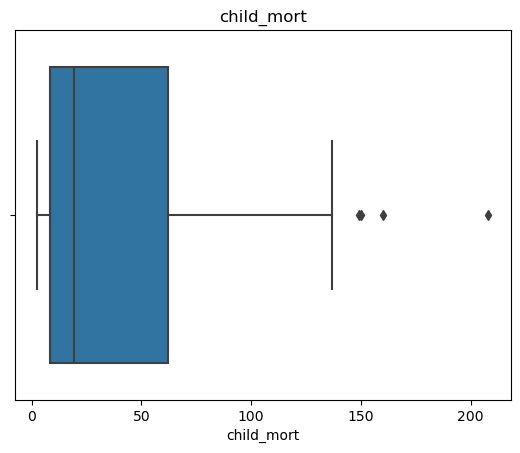

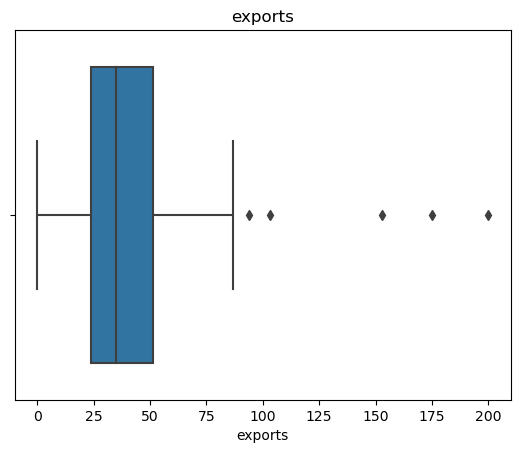

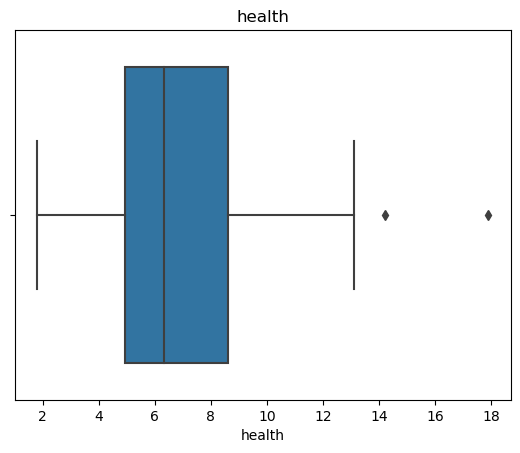

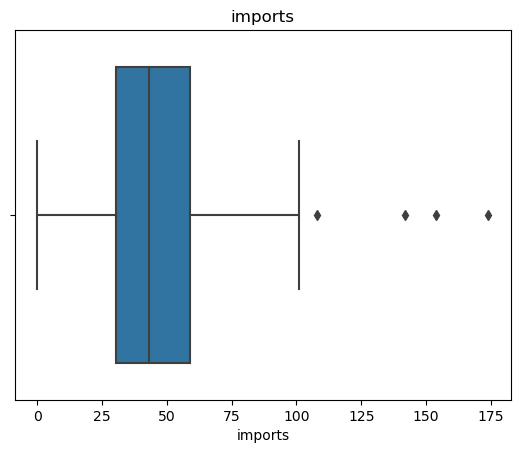

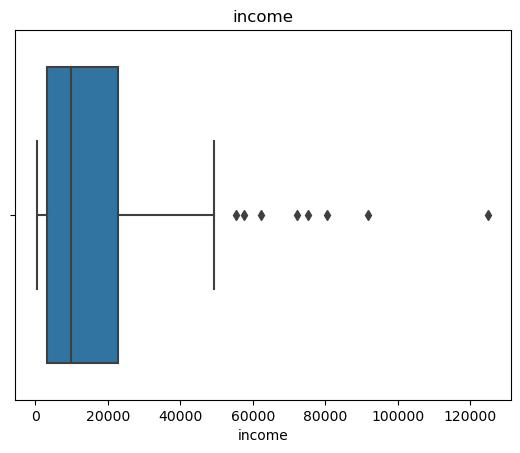

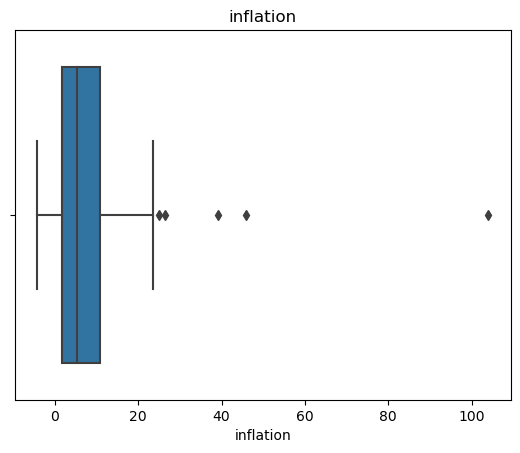

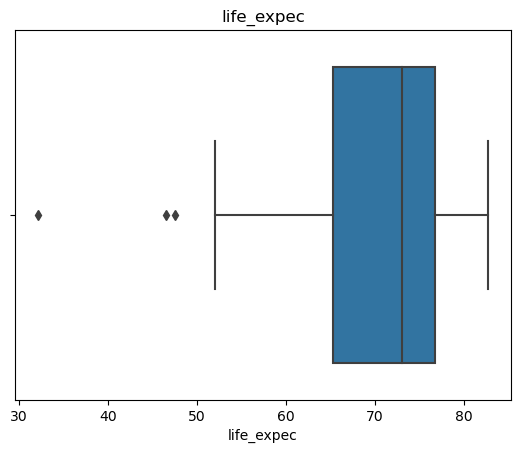

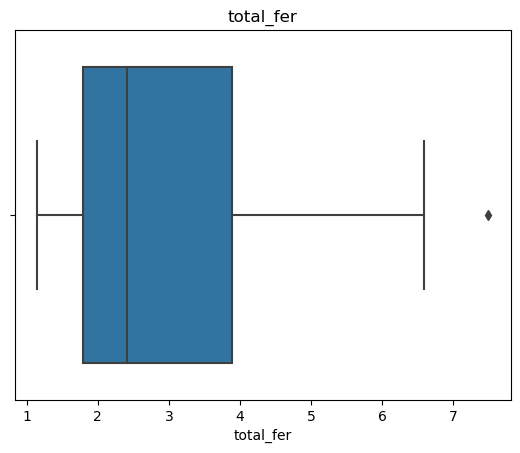

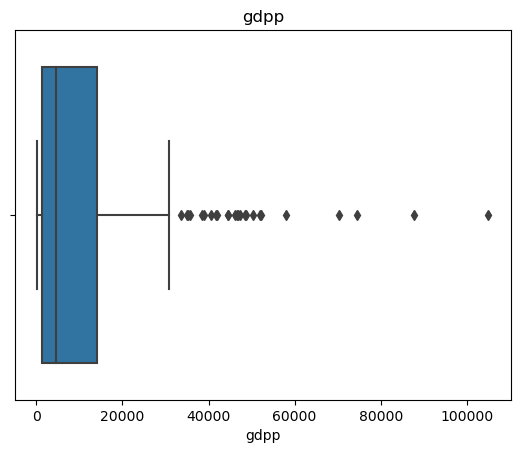

In [ ]:
columns_to_check = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for column in columns_to_check:
    sb.boxplot(x=df[column])
    plt.title(column)
    plt.show()

/Users/harlan/anaconda3/envs/unienv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/harlan/anaconda3/envs/unienv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/harlan/anaconda3/envs/unienv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/harlan/anaconda3/envs/unienv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

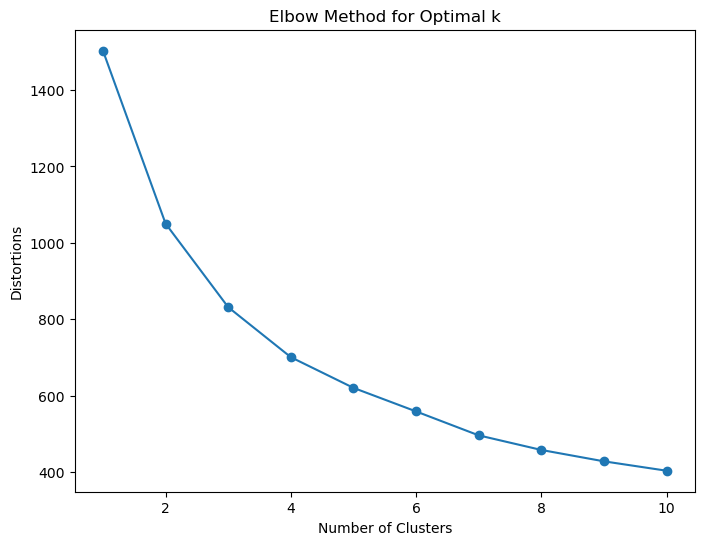

In [ ]:
# Стандартизація даних
scaler = StandardScaler()
data_scaled = scaler.fit_transform( df)

# Знаходження оптимального k за допомогою методу ліктя
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortions')
plt.show()

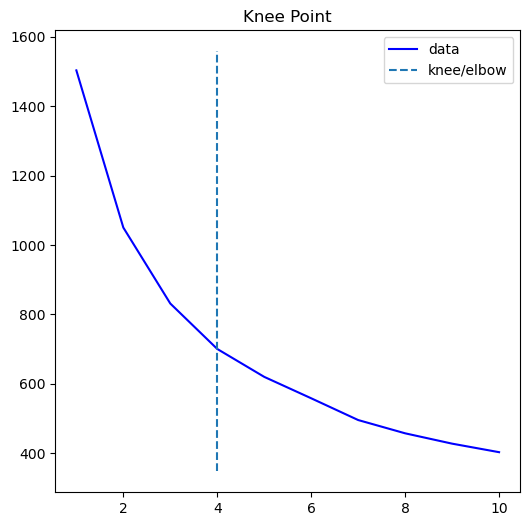

/Users/harlan/anaconda3/envs/unienv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Визначення оптимального k за допомогою kneed
kl = KneeLocator(range(1, 11), distortions, curve='convex', direction='decreasing')
optimal_k = kl.elbow
kl.plot_knee()
plt.show()

# Кластеризація з оптимальним k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans_optimal.fit_predict(data_scaled)

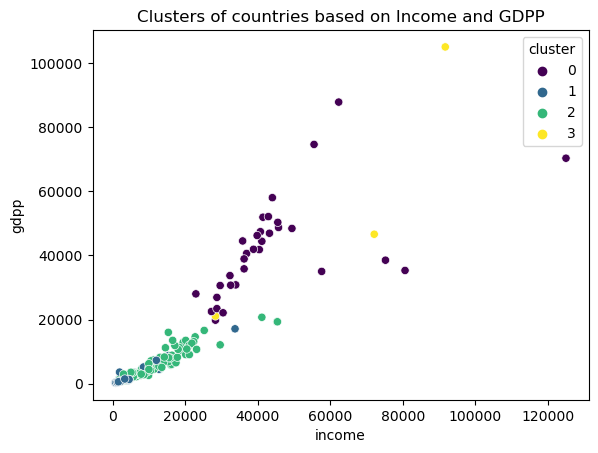

In [ ]:
# Візуалізація результатів кластеризації для Income та GDPP
sb.scatterplot(x='income', y='gdpp', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of countries based on Income and GDPP')
plt.show()

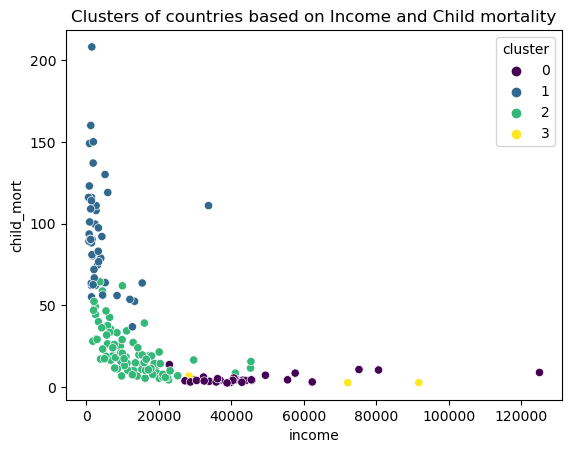

In [ ]:
# Візуалізація результатів кластеризації для Income та Children mortality
sb.scatterplot(x='income', y='child_mort', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of countries based on Income and Child mortality')
plt.show()

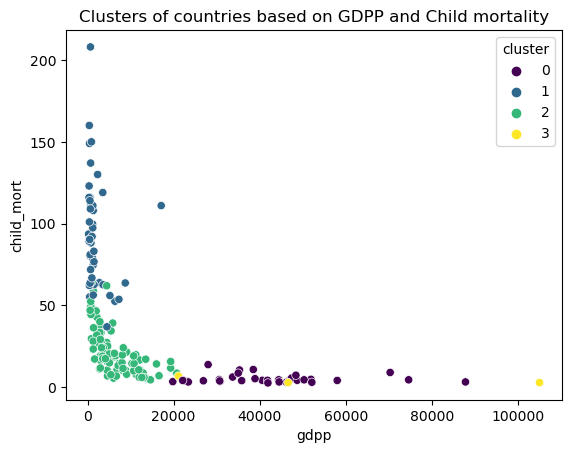

In [ ]:
# Візуалізація результатів кластеризації для GDPP та Children mortality
sb.scatterplot(x='gdpp', y='child_mort', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of countries based on GDPP and Child mortality')
plt.show()